<a href="https://colab.research.google.com/github/iliaxheblati/rdata/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Github link: https://github.com/ds5110/hw1-seaborn-iliaxheblati

In [1]:
#import Python libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Question One

Use Seaborn to recreate Figure 1.1 in the book, including the models, with all 3 subplots in the same figure.

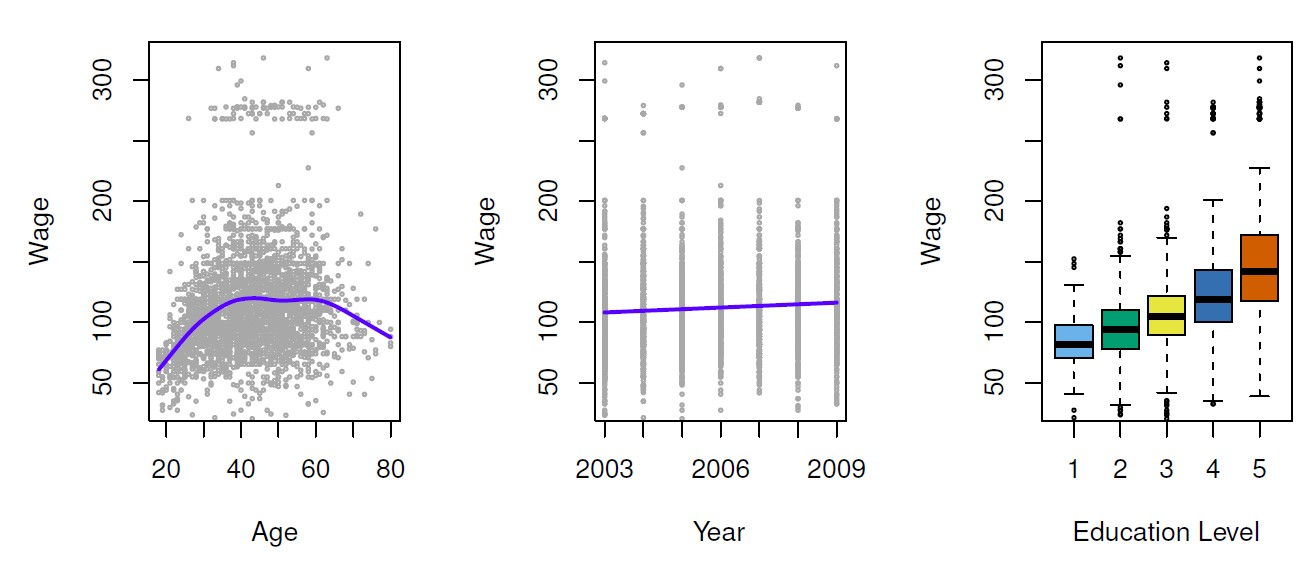

In [2]:
# Get wage data
df_wage = pd.read_csv('https://raw.githubusercontent.com/ds5110/rdata/main/data/Wage.csv')
df_wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
# Sources used:
# 1- https://stackoverflow.com/questions/44206962/splitting-column-value-into-2-new-columns-python-pandas

# Create new column education_level based on education number values
df_wage["education_level"] = df_wage["education"].str.split(".", expand=True)[0]


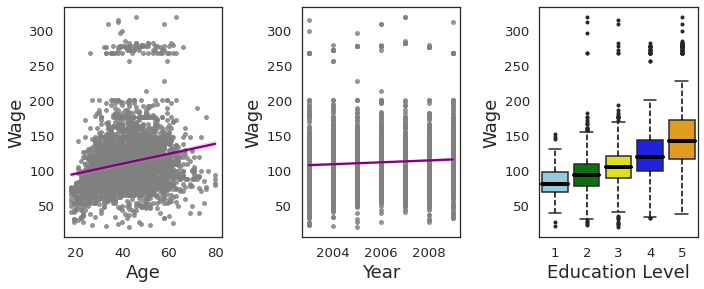

In [23]:
# Sources used: 
# 1  - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html
# 2  - https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
# 3  - https://seaborn.pydata.org/generated/seaborn.regplot.html
# 4  - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
# 5  - https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
# 6  - https://stackoverflow.com/questions/36921550/how-to-change-the-point-size-for-regplot-seaborns-scatter-plot-function-pyt
# 7  - https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html
# 8  - https://stackoverflow.com/questions/46226032/how-to-change-the-linestyle-of-whiskers-in-pandas-boxplots

# Set theme properties
sns.set_theme(style='white', 
              palette=None,
              font_scale = 1.2)

# Create the canvas for ploting 3 visualizations
f, ax = plt.subplots(nrows=1, 
                     ncols=3, 
                     figsize=(11,4))

# Adjust subplot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

# Plot data and a linear regression model fit: wage as a function of age
plot_age_Wage = sns.regplot(x='age', 
            y='wage', 
            data=df_wage, 
            color='gray', 
            marker='o' , 
            scatter_kws={'s':15}, 
            line_kws={'color':'purple'},
            ax=ax[0])

plot_age_Wage.set_xlabel("Age", fontsize = 18)
plot_age_Wage.set_ylabel("Wage", fontsize = 18)

# Plot data and a linear regression model fit: wage as a function of year
plot_year_Wage = sns.regplot(x='year', 
            y='wage', 
            data=df_wage, 
            color='gray', 
            marker='o', 
            scatter_kws={'s':15}, 
            line_kws={'color':'purple'}, 
            ax=ax[1])
plot_year_Wage.set_xlabel("Year", fontsize = 18)
plot_year_Wage.set_ylabel("Wage", fontsize = 18)

# Adjust box properties
boxprops_fig1 = dict(linestyle='-', 
                linewidth=1.5)

# Adjust flier properties
flierprops_fig1  = dict(marker ='o', 
                  markersize=3, 
                  color="black")

# Adjust median properties
medianprops_fig1  = dict(linewidth=4, 
                   color="black")

# Adjust whisker properties
whiskerprops_fig1  = dict(linestyle='--', 
                    linewidth=1.5, 
                    color='black')

# Set education_level colors
custom_pal_fig1  = {"1": "skyblue",
              "2": "green", 
              "3":"yellow", 
              "4":"blue", 
              "5":"orange"}

# Plot boxplots: wage as a function of education
plot_ed_Wage = sns.boxplot(x='education_level', 
            y='wage', 
            order=['1', '2', '3', '4', '5'],
            data=df_wage, 
            flierprops=flierprops_fig1,
            medianprops=medianprops_fig1,
            boxprops=boxprops_fig1,
            whiskerprops=whiskerprops_fig1, 
            palette=custom_pal_fig1,
            ax=ax[2])

plot_ed_Wage.set_xlabel("Education Level", fontsize = 18)
plot_ed_Wage.set_ylabel("Wage", fontsize = 18)

# Display plot
plt.show()

Use Seaborn with the Smarket dataset (in the rdata repo) to recreate Figure 1.2 in the book from the original (messy) dataframe.

# Question Two

Use Seaborn with the Smarket dataset (in the rdata repo) to recreate Figure 1.2 in the book from the original (messy) dataframe.

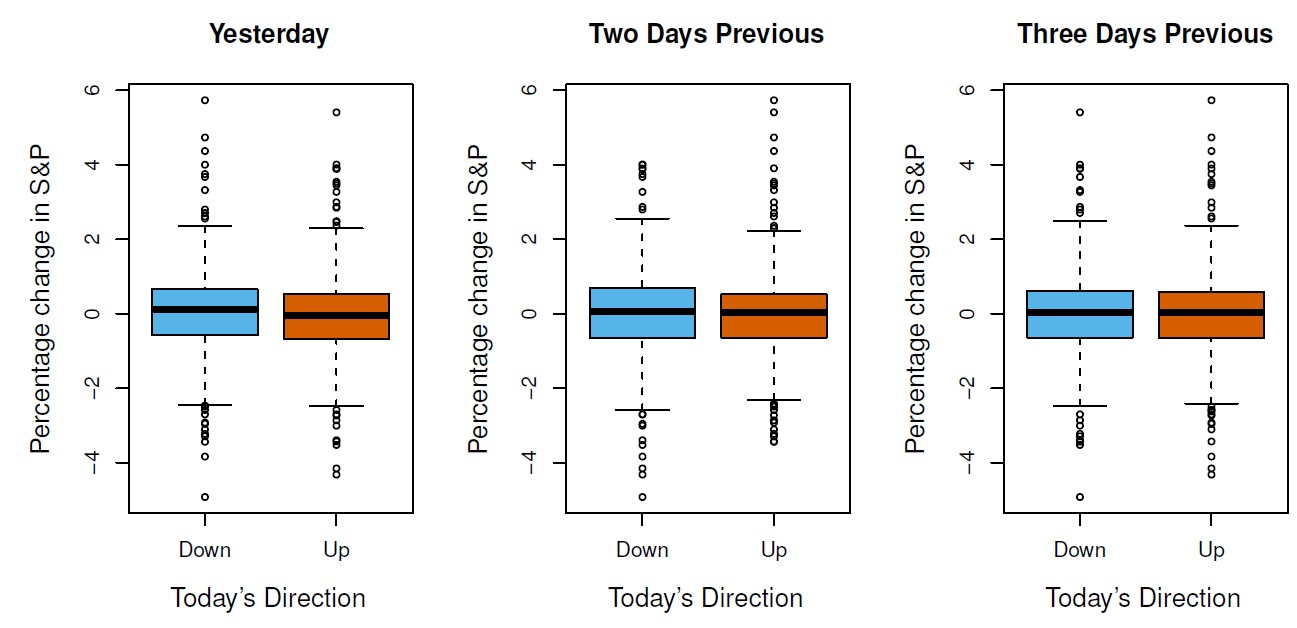

In [5]:
# Get Smarket data
df_smarket = pd.read_csv('https://raw.githubusercontent.com/ds5110/rdata/main/data/Smarket.csv')
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


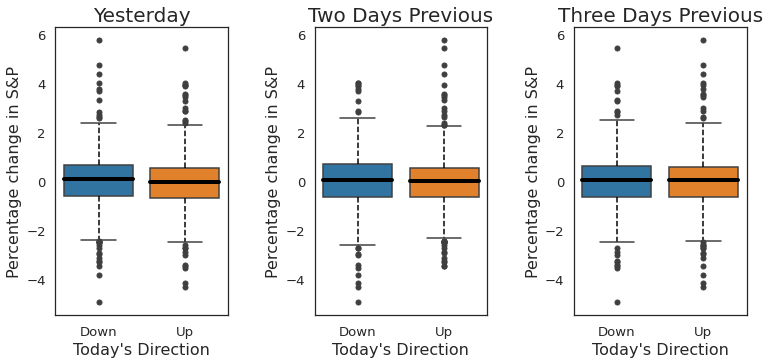

In [19]:
# Set theme properties
sns.set_theme(style='white', 
              palette=None,
              font_scale = 1.2)

# Create the canvas for ploting 3 visualizations
f, ax = plt.subplots(nrows=1, 
                     ncols=3, 
                     figsize=(12,5))

# Adjust subplot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

# Adjust box properties
boxprops_fig2 = dict(linestyle='-', 
                linewidth=1.5)

# Adjust flier properties
flierprops_fig2 = dict(marker ='o', 
                  markersize=5,
                  linewidth=0.5, 
                  color="black")

# Adjust median properties
medianprops_fig2 = dict(linewidth=4, 
                   color="black")

# Adjust whisker properties
whiskerprops_fig2 = dict(linestyle='--', 
                    linewidth=1.5, 
                    color='black')

# Plot boxplots of the previous day’s percentage change in the S&P
# index for the days for which the market increased or decreased
plot_lag1_messy = sns.boxplot(ax=ax[0], 
                        data=df_smarket, 
                        x='Direction', 
                        y='Lag1',
                        order=['Down', 'Up'],
                        flierprops=flierprops_fig2,
                        medianprops=medianprops_fig2,
                        boxprops=boxprops_fig2,
                        whiskerprops=whiskerprops_fig2)

plot_lag1_messy .set_xlabel("Today's Direction", fontsize = 16)
plot_lag1_messy .set_ylabel("Percentage change in S&P", fontsize = 16)
plot_lag1_messy .set_title("Yesterday", fontsize = 20)

# Plot boxplots of the percentage changes for 2 previous

plot_lag2_messy = sns.boxplot(ax=ax[1], 
                        data=df_smarket, 
                        x='Direction', 
                        y='Lag2',
                        order=['Down', 'Up'],
                        flierprops=flierprops_fig2,
                        medianprops=medianprops_fig2,
                        boxprops=boxprops_fig2,
                        whiskerprops=whiskerprops_fig2)

plot_lag2_messy .set_xlabel("Today's Direction", fontsize = 16)
plot_lag2_messy .set_ylabel("Percentage change in S&P", fontsize = 16)
plot_lag2_messy .set_title("Two Days Previous", fontsize = 20)



# Plot boxplots of the percentage changes for 2 previous
plot_lag3_messy = sns.boxplot(ax=ax[2], 
                        data=df_smarket, 
                        x='Direction', 
                        y='Lag3',
                        order=['Down', 'Up'],
                        flierprops=flierprops_fig2,
                        medianprops=medianprops_fig2,
                        boxprops=boxprops_fig2,
                        whiskerprops=whiskerprops_fig2)

plot_lag3_messy .set_xlabel("Today's Direction", fontsize = 16)
plot_lag3_messy .set_ylabel("Percentage change in S&P", fontsize = 16)
plot_lag3_messy .set_title("Three Days Previous", fontsize = 20)

plt.show()

# Question Three and Four

Put a dataframe with the Smarket dataset into tidy form. Use .head() to print the first few lines the result.

In [24]:
# Sources Used:
# 1 - https://dataindependent.com/pandas/pandas-melt-pd-melt/

# Remove unused columns
df_smarket.drop(['Lag4', 'Lag5','Volume', 'Today'], axis = 1)
df_smarket.head()

# Tidy data by combining all lags into one column
tidy_df_smarket = df_smarket.melt(
    id_vars=['Direction'], 
    value_vars=['Lag1', 'Lag2', 'Lag3'],
    var_name='lag_type', 
    value_name='lag_value')
tidy_df_smarket.head()

,Direction,lag_type,lag_value
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


Recreate Figure 1.2 with Seaborn using the tidy form of the Smarket dataset.

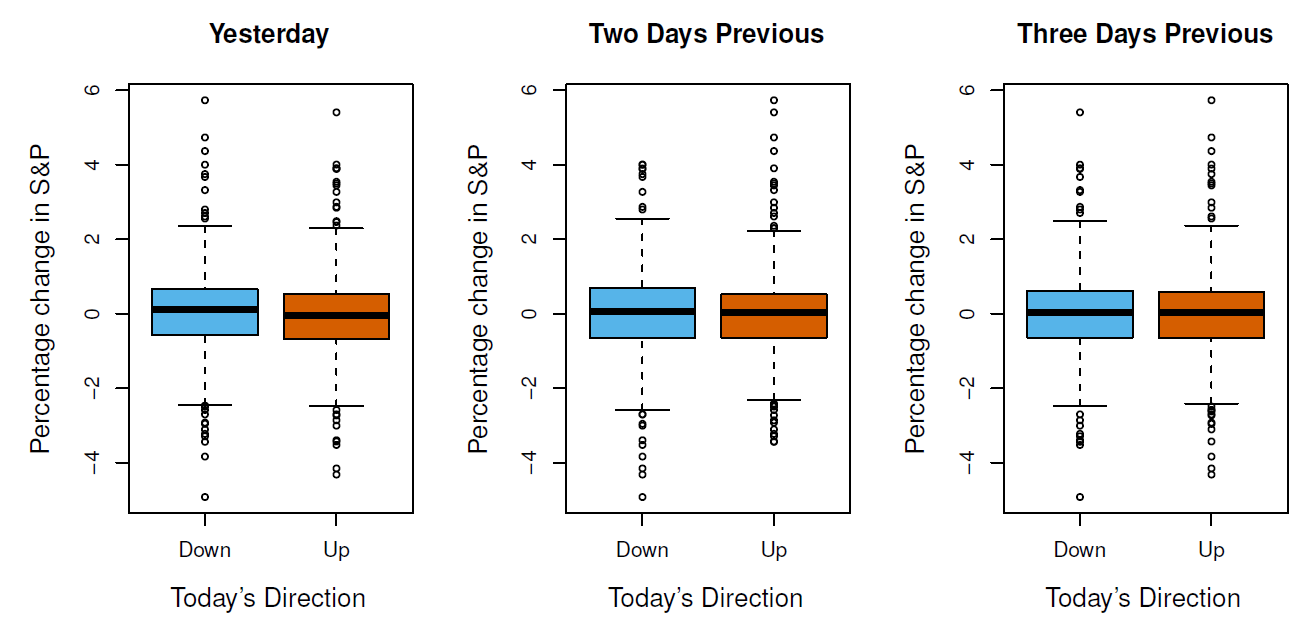

In [25]:
# Create a new dataframe filtering by lag 1
smarket_lag_one = tidy_df_smarket.loc[tidy_df_smarket['lag_type'] == "Lag1"] 

# Create a new dataframe filtering by lag 2
smarket_lag_two = tidy_df_smarket.loc[tidy_df_smarket['lag_type'] == "Lag2"] 

# Create a new dataframe filtering by lag 3
smarket_lag_three = tidy_df_smarket.loc[tidy_df_smarket['lag_type'] == "Lag3"] 

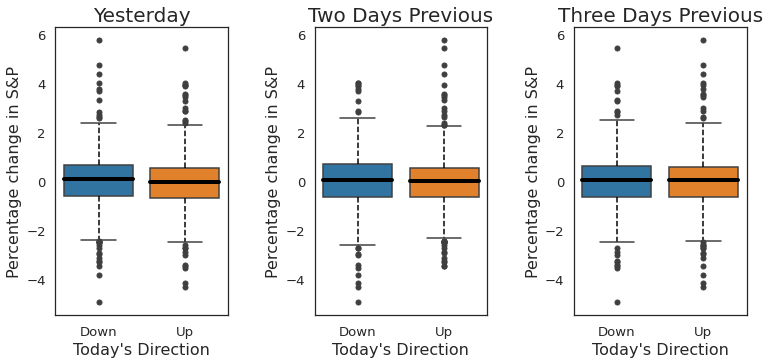

In [26]:
# Set theme properties
sns.set_theme(style='white', 
              palette=None,
              font_scale = 1.2)

# Create the canvas for ploting 3 visualizations
f, ax = plt.subplots(nrows=1, 
                     ncols=3, 
                     figsize=(12,5))

# Adjust subplot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

# Plot boxplots of the previous day’s percentage change in the S&P
# index for the days for which the market increased or decreased
plot_lag1 = sns.boxplot(ax=ax[0], 
                        data=tidy_df_smarket, 
                        x='Direction', 
                        y=smarket_lag_one['lag_value'],
                        order=['Down', 'Up'],
                        flierprops=flierprops,
                        medianprops=medianprops,
                        boxprops=boxprops,
                        whiskerprops=whiskerprops)

plot_lag1.set_xlabel("Today's Direction", fontsize = 16)
plot_lag1.set_ylabel("Percentage change in S&P", fontsize = 16)
plot_lag1.set_title("Yesterday", fontsize = 20)

# Plot boxplots of the percentage changes for 2 previous
plot_lag2 = sns.boxplot(ax=ax[1], 
                        data=tidy_df_smarket, 
                        x='Direction', 
                        y=smarket_lag_two['lag_value'],
                        order=['Down', 'Up'],
                        flierprops=flierprops_fig2,
                        medianprops=medianprops_fig2,
                        boxprops=boxprops_fig2,
                        whiskerprops=whiskerprops_fig2)

plot_lag2.set_xlabel("Today's Direction", fontsize = 16)
plot_lag2.set_ylabel("Percentage change in S&P", fontsize = 16)
plot_lag2.set_title("Two Days Previous", fontsize = 20)


# Plot boxplots of the percentage changes for 2 previous
plot_lag3 = sns.boxplot(ax=ax[2], 
                        data=tidy_df_smarket, 
                        x='Direction', 
                        y=smarket_lag_three['lag_value'],
                        order=['Down', 'Up'],
                        flierprops=flierprops_fig2,
                        medianprops=medianprops_fig2,
                        boxprops=boxprops_fig2,
                        whiskerprops=whiskerprops_fig2)

plot_lag3.set_xlabel("Today's Direction", fontsize = 16)
plot_lag3.set_ylabel("Percentage change in S&P", fontsize = 16)
plot_lag3.set_title("Three Days Previous", fontsize = 20)

plt.show()